# Programming for Data Analytics - Assignment 2 - weather

************************
*Task 02 of the assessment - Temperature over time* 
************************

            reportEndDateTime  dryBulbTemperature_Celsius
0   2024-10-02T16:15:00+00:00                   15.944444
1   2024-10-02T16:45:00+00:00                   15.777778
2   2024-10-02T17:00:00+00:00                   15.111111
3   2024-10-02T17:15:00+00:00                   14.277778
4   2024-10-02T17:30:00+00:00                   13.666667
..                        ...                         ...
84  2024-10-03T14:00:00+00:00                   14.611111
85  2024-10-03T14:15:00+00:00                   14.944444
86  2024-10-03T14:30:00+00:00                   14.944444
87  2024-10-03T14:45:00+00:00                   14.944444
88  2024-10-03T15:00:00+00:00                   14.722222

[89 rows x 2 columns]


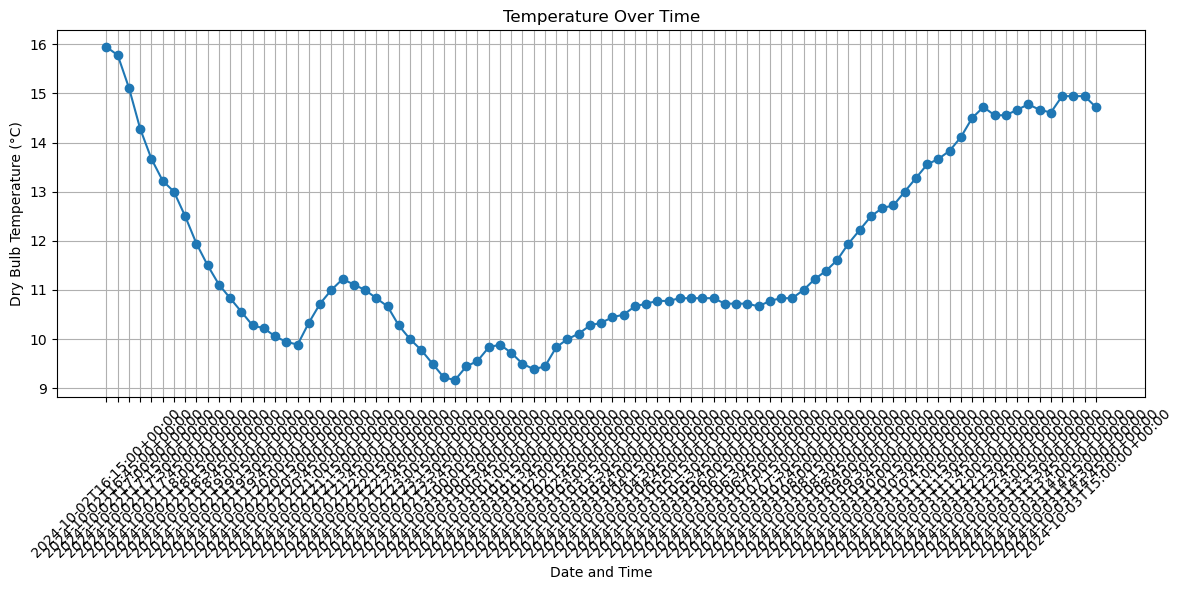

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


DATADIR = './data_files/'
FILENAME = 'weatherreadings1.csv'
df = pd.read_csv(DATADIR+FILENAME)

names_of_columns=['reportEndDateTime','dryBulbTemperature_Celsius']
df = pd.read_csv(DATADIR+FILENAME, usecols=names_of_columns)
print(df)

# print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [16]:
import re

#Function to clean the date-time format
def clean_datetime(dt):
    return re.sub(r'2024-|T|\+00:00', '', dt)

df['cleaned_datetime'] = df['reportEndDateTime'].apply(clean_datetime)

# Save to a new CSV file
df.to_csv('weatherreadings1_cleaned.csv', index=False)  

df_cleaned = pd.read_csv('weatherreadings1_cleaned.csv')

# adding space between date and time
def add_space(row):
    return re.sub(r'(\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1 \2', row)

# Apply the function to each entry in the relevant column
df_cleaned['cleaned_datetime_space'] = df['cleaned_datetime'].apply(add_space)

# Overwrite the original CSV file
df_cleaned.to_csv('weatherreadings1_cleaned_space.csv', index=False)

    dryBulbTemperature_Celsius cleaned_datetime_space
0                    15.944444         10-02 16:15:00
1                    15.777778         10-02 16:45:00
2                    15.111111         10-02 17:00:00
3                    14.277778         10-02 17:15:00
4                    13.666667         10-02 17:30:00
..                         ...                    ...
84                   14.611111         10-03 14:00:00
85                   14.944444         10-03 14:15:00
86                   14.944444         10-03 14:30:00
87                   14.944444         10-03 14:45:00
88                   14.722222         10-03 15:00:00

[89 rows x 2 columns]


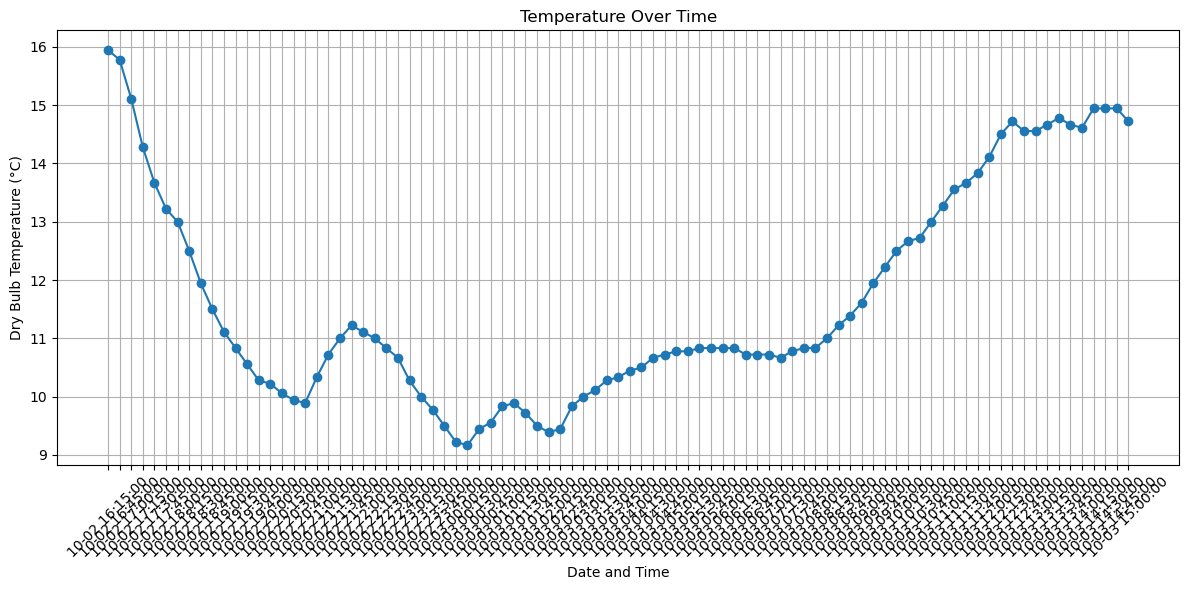

In [20]:
names_of_columns=['cleaned_datetime_space','dryBulbTemperature_Celsius']
df = pd.read_csv('weatherreadings1_cleaned_space.csv', usecols=names_of_columns)
print(df)

# print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

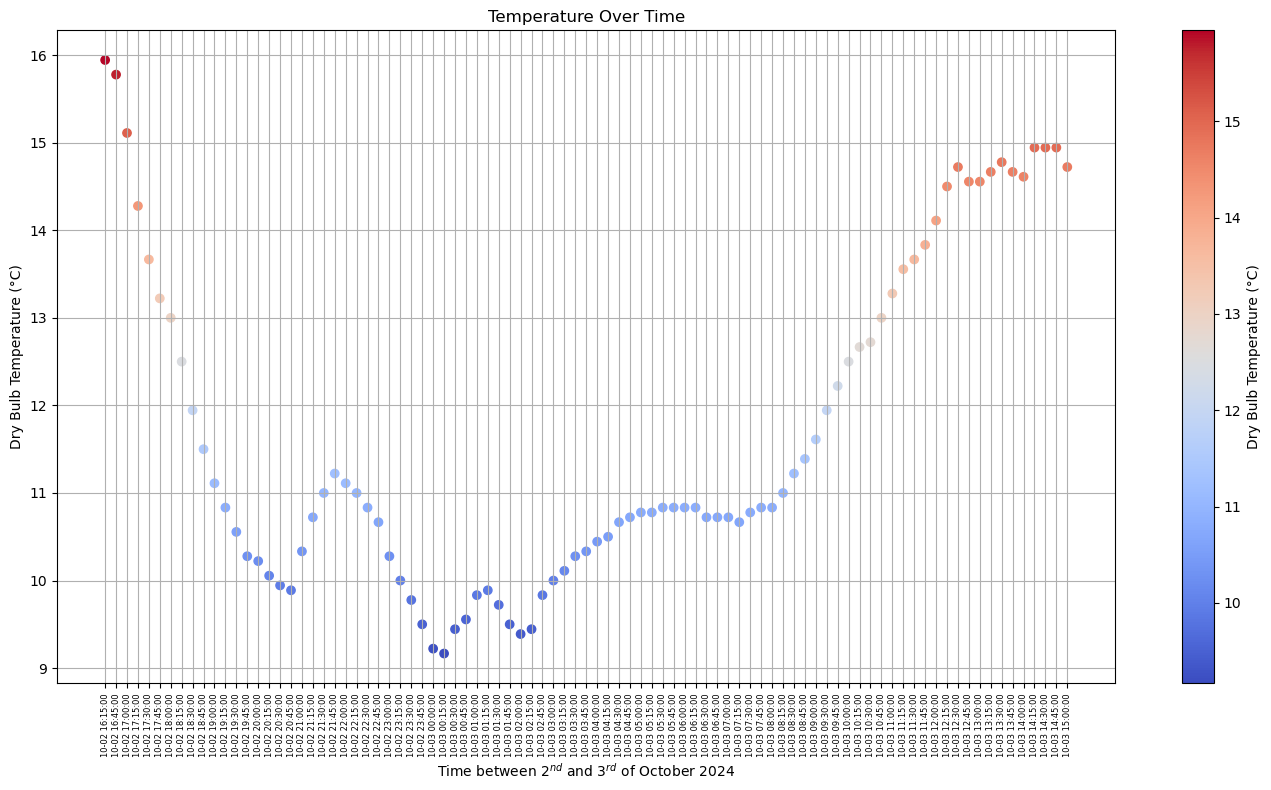

In [32]:


import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('weatherreadings1_cleaned_space.csv', usecols=names_of_columns)

fig, ax = plt.subplots(figsize=(14, 8))

# Create a scatter plot with colors based on temperature
scatter = ax.scatter(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], 
                     c=df['dryBulbTemperature_Celsius'], cmap='coolwarm', marker='o')


# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Dry Bulb Temperature (°C)')

# Adding titles and labels
ax.set_title('Temperature Over Time')
ax.set_xlabel('Time between 2$^{nd}$ and 3$^{rd}$ of October 2024')
ax.set_ylabel('Dry Bulb Temperature (°C)')

# Changing the number to set desired font size
ax.tick_params(axis='x', labelsize=6)  

# rotation
plt.xticks(rotation=90)
plt.tight_layout()
ax.grid()



notes: check the plot to show colorful lines depending on temperatue
modify the date and time


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   reportEndDateTime           89 non-null     object 
 1   dryBulbTemperature_Celsius  89 non-null     float64
 2   cleaned_datetime            89 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [18]:
df= pd.read_csv(DATADIR+FILENAME, parse_dates=['reportEndDateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     object             
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

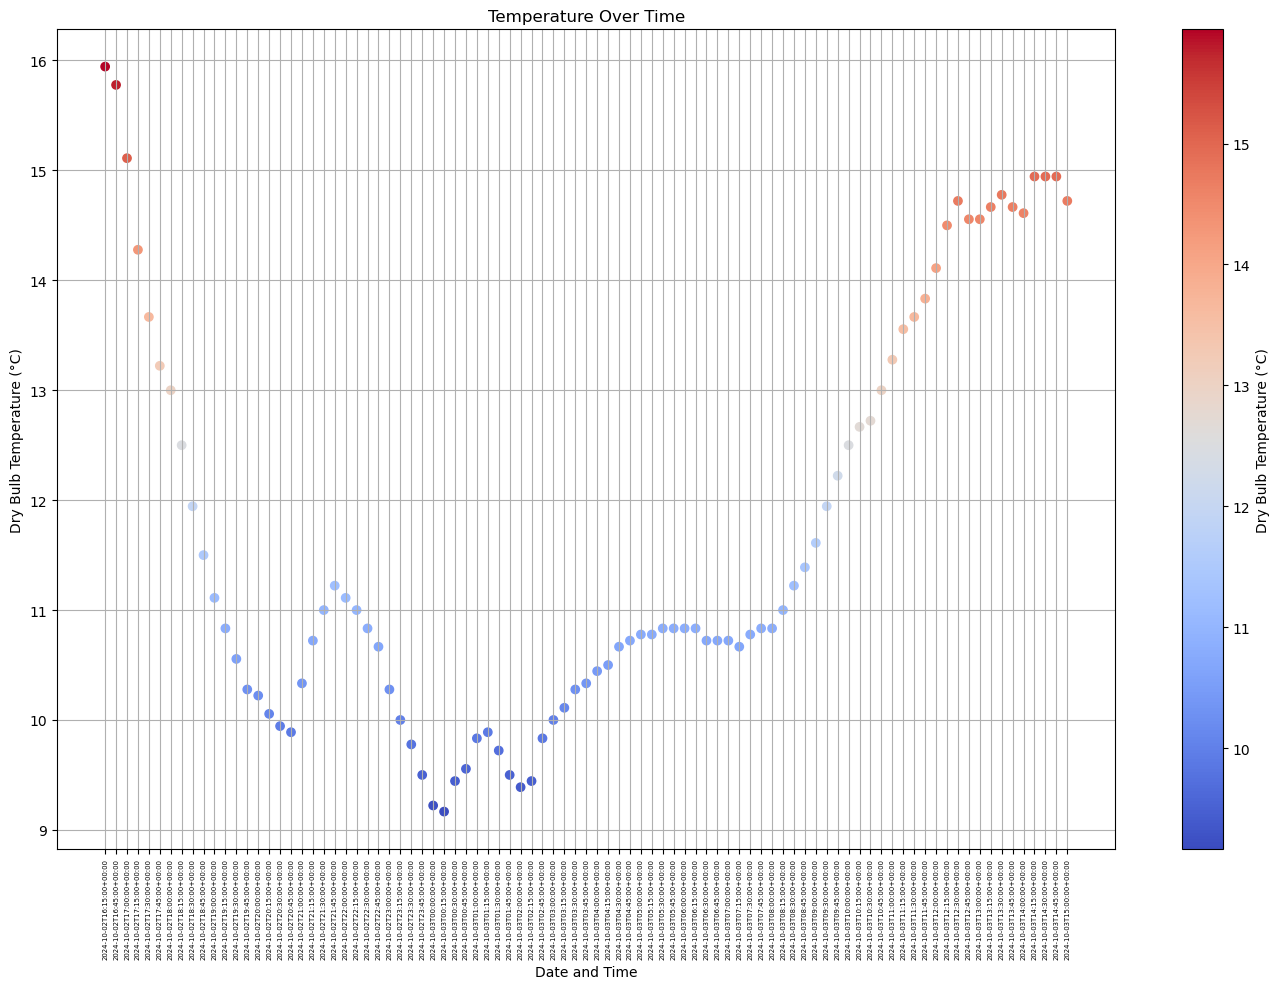

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mondbr/PFDA_assignments/refs/heads/main/data_files/weatherreadings1.csv")

fig, ax = plt.subplots(figsize=(14, 10))

# Create a scatter plot with colors based on temperature
scatter = ax.scatter(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], 
                     c=df['dryBulbTemperature_Celsius'], cmap='coolwarm', marker='o')


# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Dry Bulb Temperature (°C)')

# Adding titles and labels
ax.set_title('Temperature Over Time')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Dry Bulb Temperature (°C)')

# Changing the number to set desired font size
ax.tick_params(axis='x', labelsize=5)  

# rotation
plt.xticks(rotation=90)
plt.tight_layout()
ax.grid()

